# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

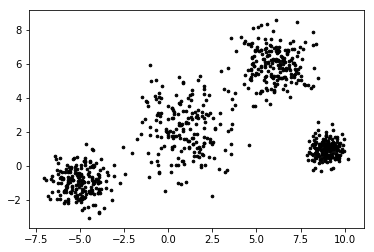

In [2]:


# Generate random data and center it to the four centers each with a different variance
center_1,center_2,center_3,center_4 = np.array([1,2]),np.array([6,6]),np.array([9,1]),np.array([-5,-1])
np.random.seed =5
data_1,data_2,data_3,data_4 = np.random.randn(200,2) * 1.5 + center_1,np.random.randn(200,2) * 1 + center_2,np.random.randn(200,2) * 0.5 + center_3,np.random.randn(200,2) * 0.8 + center_4
data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)
plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

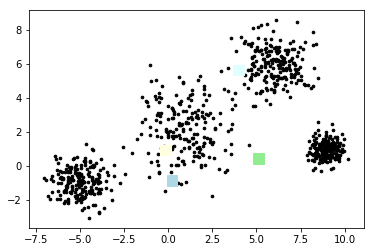

In [3]:
cols =['green', 'blue', 'yellow', 'cyan']

def showCenters(centers):
    for p,c in zip (centers,cols):
        plt.gcf().gca().add_artist(Rectangle((p[0],p[1]),0.6,0.6,color="light"+c))
        
def moveClusters(points,clusters): 
    return np.array([np.array([p for e_c,p in (zip(clusters ,points)) if e_c == c]).mean(axis=0) for c in range(0,k)])
                       
def getClosestCent(point,centroids):
    arr = [np.linalg.norm(point-c) for c in centroids]
    return arr.index(min(arr))

def reassignPoints(centers):
    return np.array([getClosestCent(e,centers) for e in data])
  
def stepKMeans(centers,cluster):
    newCents = moveClusters(data,cluster)
    return reassignPoints(newCents),newCents

def showSimple(centers):
    showCenters(centers)
    sns.scatterplot(x =data[:,0], y=data[:,1],hue=clusters,palette=cols[:np.unique(clusters).size],edgecolor='r',linewidth=0.5)
    plt.tick_params(axis='both', which='both', bottom=False, left=False,labelbottom=False,labelleft=False) 
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

k,c,np.random.seed = 4,2,6
centers = np.random.randn(k,c)*np.std(data) + np.mean(data)

while len(np.unique(reassignPoints(centers))) != 4: #this is to catch the edge case where a cluster has 0 points
    centers = np.random.randn(k,c)*np.std(data) + np.mean(data)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
showCenters(centers)
plt.show()

## Cluster Generation

Most of the cluster generation is self explanitory but i had to add a loop in to ensure that the randomness dont not permit a cluster with 0 points in it, this would cause a bug later in my program. While setting the seed should fix this for some reason it does not.

## K-Means Implemenation

above i have implemented a verry simple k-means algorithim. while real wold aplications typicaly include random initalization, comparing of multiple runs aswell as measures to reduce the distance calculations such as [K-Trees](https://en.wikipedia.org/wiki/K-tree).

my algorithim as 2 parts;

1. Relocate every cluster to the center of all points contained within it (the average), i do so in a function called "MoveClusters", it simply makes K arrays coresponding to each vector then it takes the average point.
2. Reassign points based on what cluster "centeroid()" is closest, this is done in a function called "reassignPoints()" it simply passes every point to a function called "getClosestCent()" that will return the index (also the cluster name) of the closest cluster center.

once these where completed all i had to do is run MoveClusters() then MoveCents() for 1 iteration of the algorithim.

along with this i have made some auxilary functions to make both display simpler, such as the ability to draw the centers.

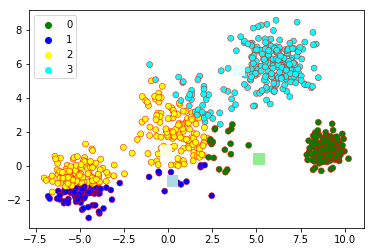

In [4]:
clusters = reassignPoints(centers)
sns.scatterplot(x =data[:,0], y=data[:,1], hue=clusters,palette=cols[:np.unique(clusters).size],edgecolor='r',linewidth=0.5)
showCenters(centers)
None

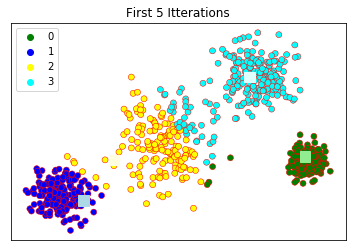

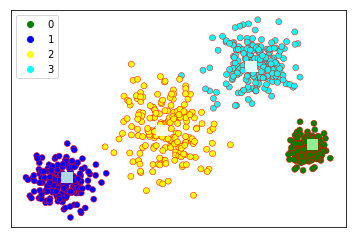

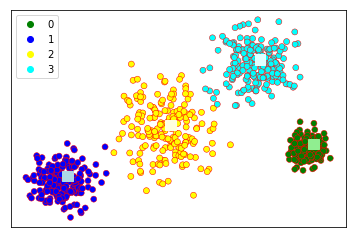

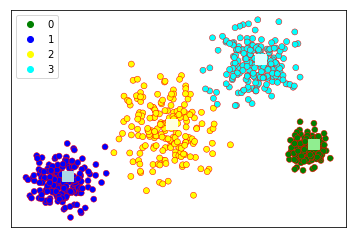

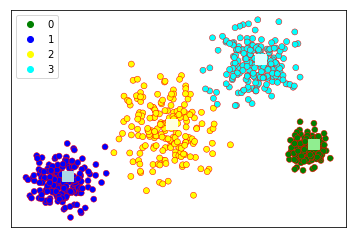

In [5]:
plt.title('First 5 Itterations')
currCenter = centers
for i in range(0,5):
    clusters, currCenter = stepKMeans(currCenter,clusters)
    showSimple(currCenter)             
None

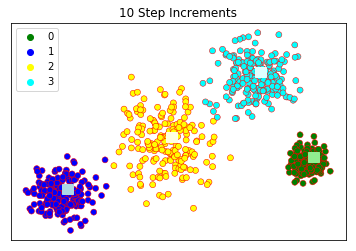

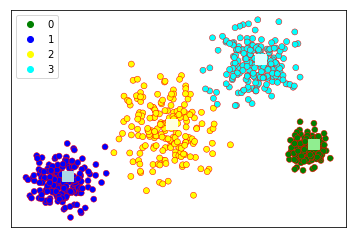

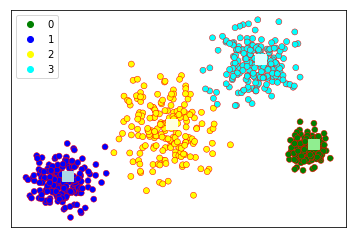

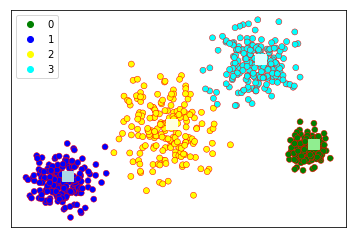

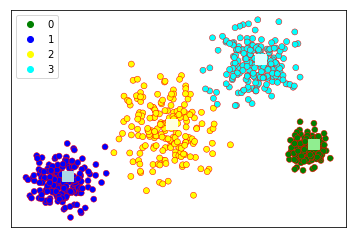

In [6]:
plt.title('10 Step Increments')
for i in range(0,5):
    for step in range(0,10):
        clusters,currCenter = stepKMeans(currCenter,clusters)
    showSimple(currCenter)
None